In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import date

DATECOLS = ['INIZIO_PUBBLICITA', 'FINE_PUBBLICITA', 'DATA']

In [2]:
dataset = pd.read_csv('../data/raw/train.csv')

In [3]:
dataset.head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
0       279.0        2016-04-01      2016-04-23                      7   
1       286.0        2016-04-01      2016-04-23                      7   
2         1.0        2000-01-01      2030-12-31                      6   
3       699.0        2016-06-16      2016-08-02                      7   
4       473.0        2000-01-01      2016-05-02                      7   

   FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA        DATA  \
0              1                  1              5.0  2016-04-07   
1              1                  1              5.0  2016-04-14   
2              4                  4              3.0  2016-02-10   
3              1                  1              4.0  2016-07-28   
4              1                  1              4.0         NaN   

   CODICE_GIOCO  RILANCIO_PUBBLICITA   SESSIONE  NUMERO_CLICK_SITO  \
0           461                   30  121941195               5510   
1           761                  161  122582337               5150   
2           628                  174  117101149               5510   
3           363                  179  134105783               5160   
4           105                  168  124139895               5239   

   OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  MICRO_CATEGORIA_GIOCO  \
0                 0.100                      2                      1   
1                 0.182                      3                      1   
2                 0.000                      2                      1   
3                 0.231                      3                      1   
4                 0.220                      2                      1   

   AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI      ID  
0           0                              1   85091  
1           0                              0   18118  
2           0                              1  129575  
3           0                              0   38961  
4         114                              4  133839

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127888 entries, 0 to 127887
Data columns (total 18 columns):
PUBBLICITA                       127148 non-null float64
INIZIO_PUBBLICITA                127888 non-null object
FINE_PUBBLICITA                  127888 non-null object
MACRO_TIPO_PUBBLICITA            127888 non-null int64
FASCIA_ORARIA                    127888 non-null int64
FASCIA_TEMPISTICA                127888 non-null int64
TIPO_PUBBLICITA                  127368 non-null float64
DATA                             124729 non-null object
CODICE_GIOCO                     127888 non-null int64
RILANCIO_PUBBLICITA              127888 non-null int64
SESSIONE                         127888 non-null int64
NUMERO_CLICK_SITO                127888 non-null int64
OFFERTA_PROMOZIONALE             127888 non-null float64
MACRO_CATEGORIA_GIOCO            127888 non-null int64
MICRO_CATEGORIA_GIOCO            127888 non-null int64
AREA_CLICK                       127888 non-null int64


In [5]:
dataset.describe()

PUBBLICITA  MACRO_TIPO_PUBBLICITA  FASCIA_ORARIA  FASCIA_TEMPISTICA  \
count  127148.000000          127888.000000  127888.000000      127888.000000   
mean      326.203330               5.816378       2.509805           2.776203   
std       280.481683               1.835892       1.917565           2.181093   
min         1.000000               1.000000       1.000000           1.000000   
25%       108.000000               6.000000       1.000000           1.000000   
50%       210.000000               7.000000       1.000000           1.000000   
75%       618.000000               7.000000       4.000000           4.000000   
max       840.000000               8.000000       6.000000           8.000000   

       TIPO_PUBBLICITA   CODICE_GIOCO  RILANCIO_PUBBLICITA      SESSIONE  \
count    127368.000000  127888.000000        127888.000000  1.278880e+05   
mean          3.964858     392.297940            94.743635  1.235237e+08   
std           1.160202     221.969084            51.401158  4.188625e+06   
min           1.000000       1.000000             1.000000  1.163034e+08   
25%           3.000000     199.000000            53.000000  1.198935e+08   
50%           4.000000     440.000000            99.000000  1.236580e+08   
75%           5.000000     595.000000           142.000000  1.268844e+08   
max           7.000000     807.000000           181.000000  1.349159e+08   

       NUMERO_CLICK_SITO  OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  \
count      127888.000000         127888.000000          127888.000000   
mean         5505.730616              0.156185               1.986535   
std           579.002292              0.136981               0.454355   
min          -100.000000              0.000000               1.000000   
25%          5340.000000              0.000000               2.000000   
50%          5472.000000              0.149000               2.000000   
75%          5660.000000              0.243000               2.000000   
max         15050.000000              2.778000               3.000000   

       MICRO_CATEGORIA_GIOCO     AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI  \
count               127888.0  127888.000000                  127888.000000   
mean                     1.0       5.113865                       1.733009   
std                      0.0      15.235427                       3.506405   
min                      1.0       0.000000                       0.000000   
25%                      1.0       0.000000                       0.000000   
50%                      1.0       0.000000                       1.000000   
75%                      1.0       0.000000                       1.000000   
max                      1.0     115.000000                      37.000000   

                  ID  
count  127888.000000  
mean    83920.230686  
std     48428.294332  
min         1.000000  
25%     41950.750000  
50%     84000.500000  
75%    125822.250000  
max    167839.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f180cc56278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f18094b64e0>]], dtype=object)

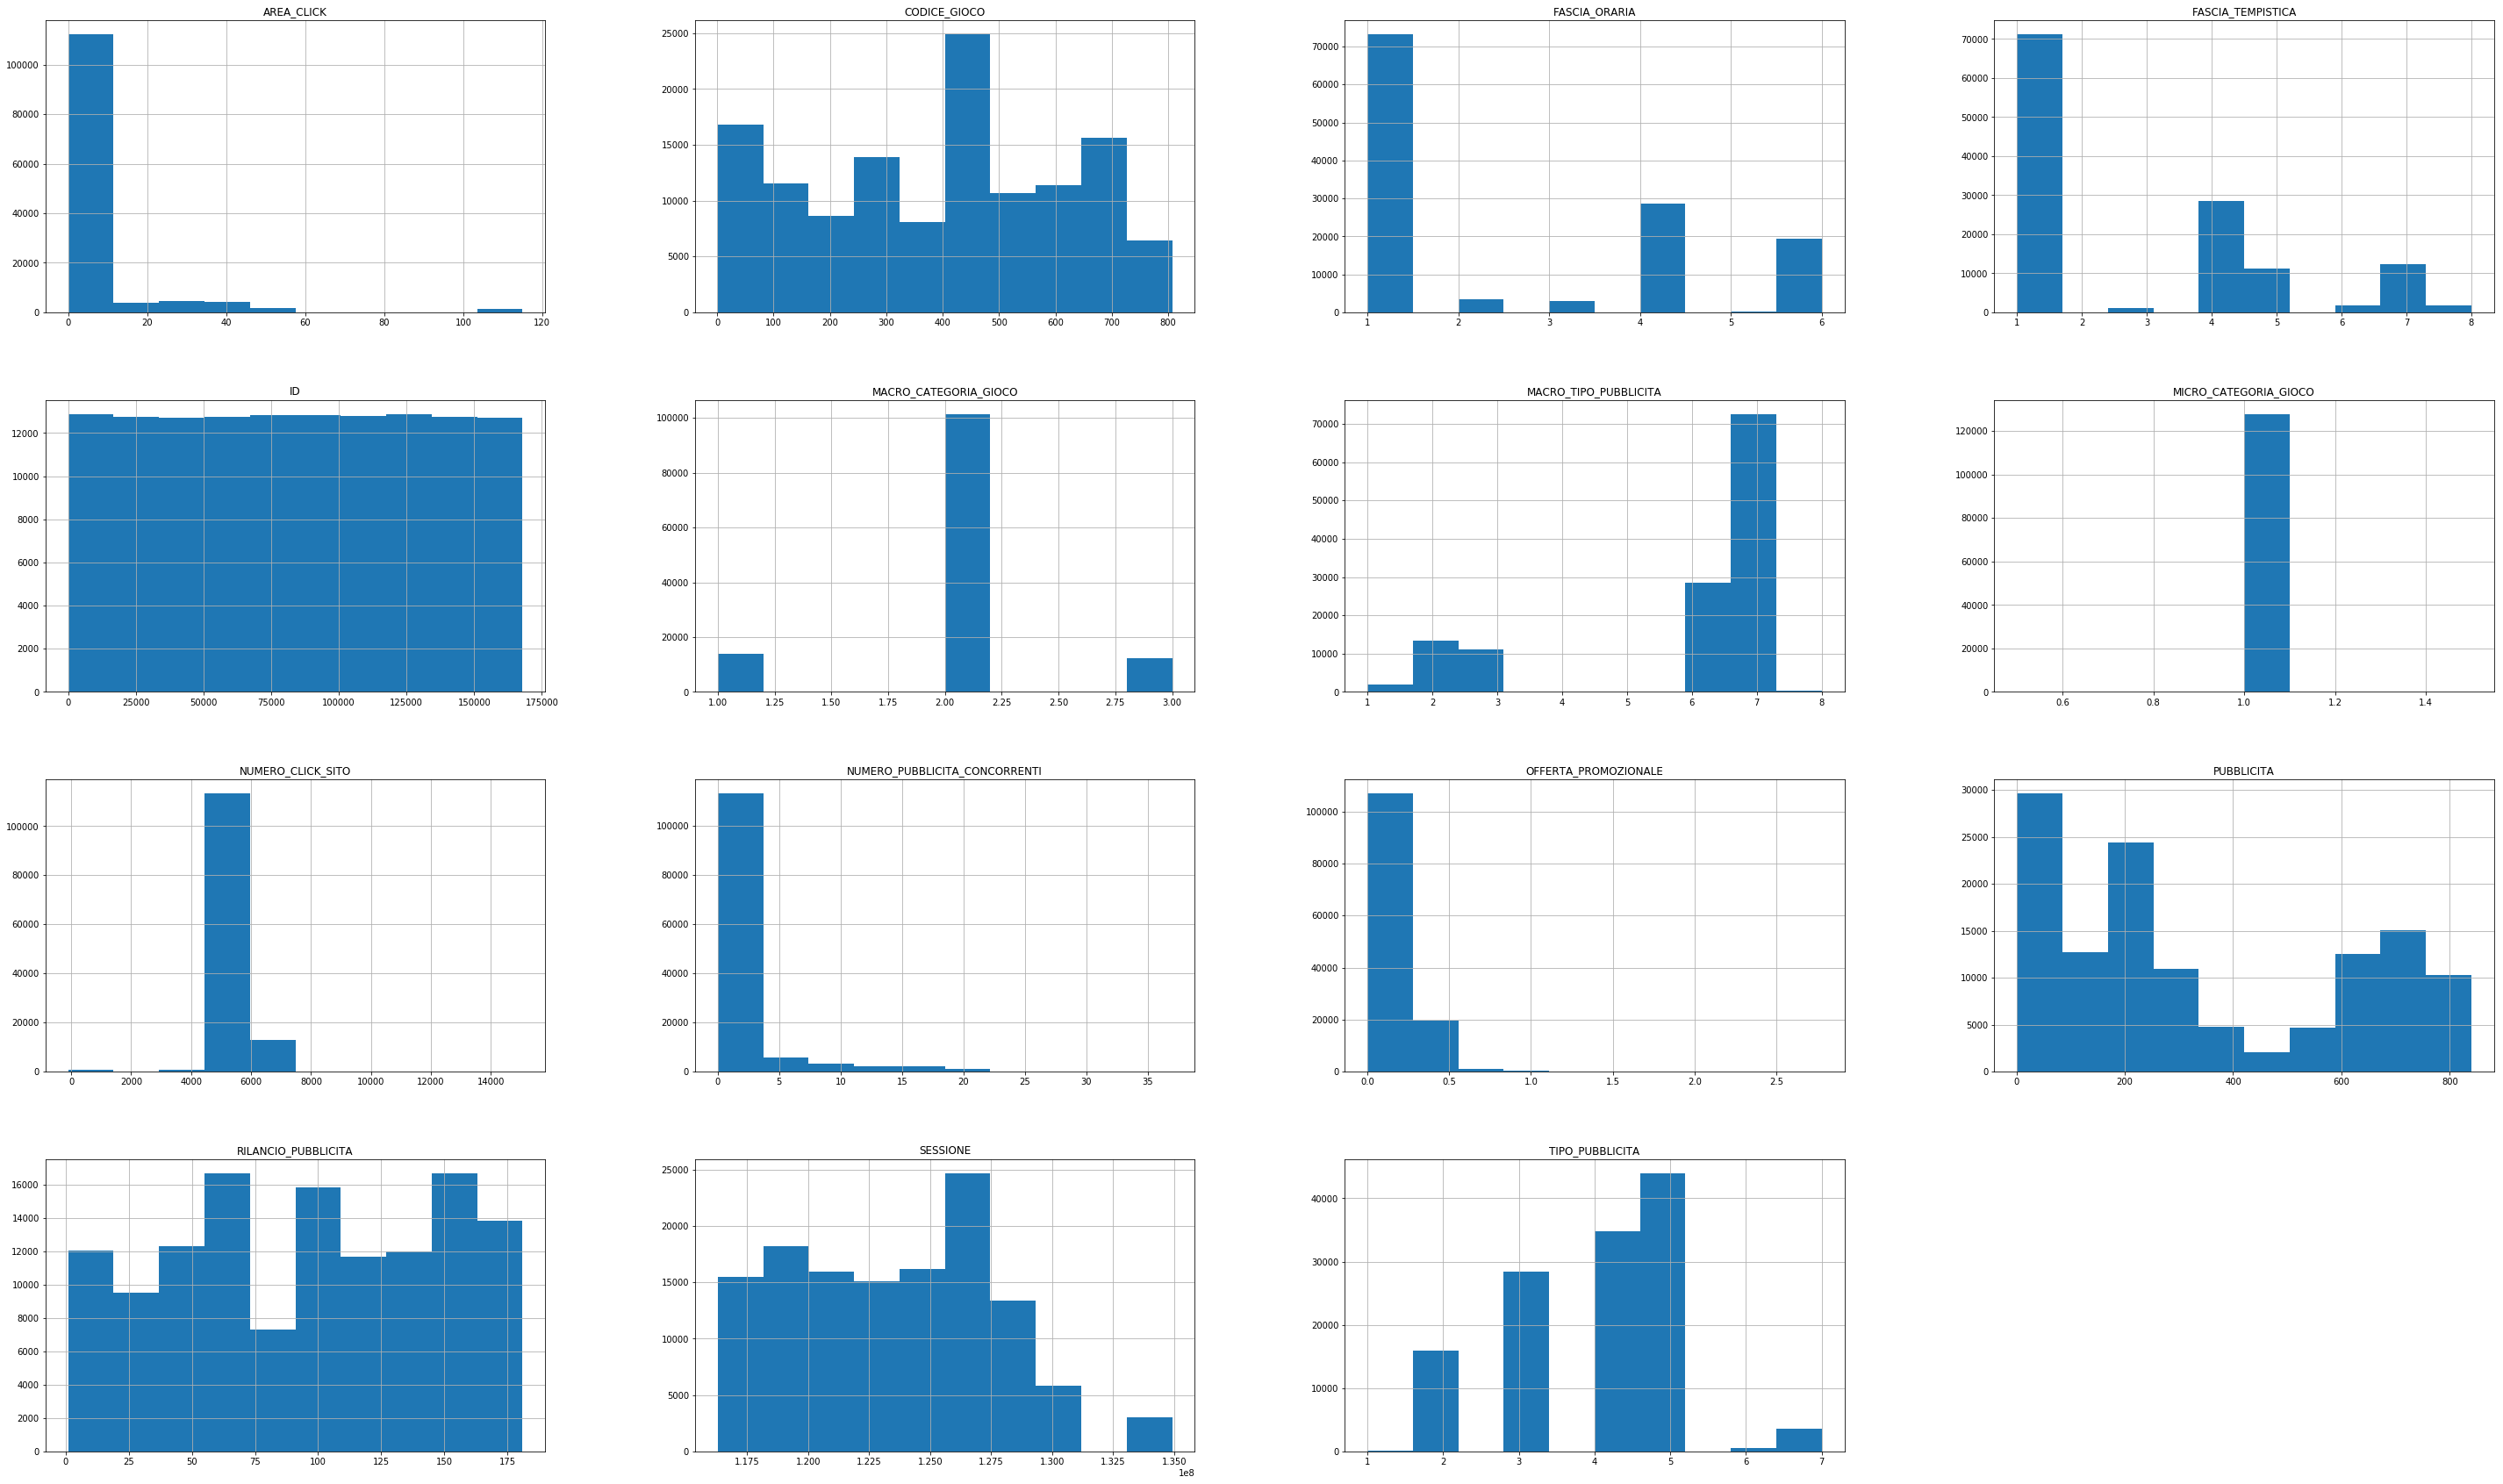

In [7]:
%matplotlib inline
dataset.hist(figsize=(50, 30))

# NA checking

Check if exists a value in each column

In [9]:
dataset.isnull().any()

PUBBLICITA                        True
INIZIO_PUBBLICITA                False
FINE_PUBBLICITA                  False
MACRO_TIPO_PUBBLICITA            False
FASCIA_ORARIA                    False
FASCIA_TEMPISTICA                False
TIPO_PUBBLICITA                   True
DATA                              True
CODICE_GIOCO                     False
RILANCIO_PUBBLICITA              False
SESSIONE                         False
NUMERO_CLICK_SITO                False
OFFERTA_PROMOZIONALE             False
MACRO_CATEGORIA_GIOCO            False
MICRO_CATEGORIA_GIOCO            False
AREA_CLICK                       False
NUMERO_PUBBLICITA_CONCORRENTI    False
ID                               False
dtype: bool

In [10]:
null_pubblicita = dataset['PUBBLICITA'].isnull().sum()
null_tipo_pubblicita = dataset['TIPO_PUBBLICITA'].isnull().sum()
null_data = dataset['DATA'].isnull().sum()
print(f'#null pubblicita: {null_pubblicita},\n#null tipo pubblicita: {null_tipo_pubblicita}\n#null data: {null_data}')

#null pubblicita: 740,
#null tipo pubblicita: 520
#null data: 3159


Find the rows with null values

In [11]:
dataset[dataset.isnull().any(axis=1)]

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
4            473.0        2000-01-01      2016-05-02                      7   
21           189.0        2016-02-26      2016-03-09                      7   
61             NaN        2016-03-10      2016-03-28                      7   
122          189.0        2016-02-26      2016-03-09                      7   
128          734.0        2016-06-19      2016-07-01                      7   
157            NaN        2016-06-13      2016-06-14                      2   
179          732.0        2016-06-19      2016-07-01                      7   
185          187.0        2016-02-26      2016-03-09                      7   
190            1.0        2000-01-01      2030-12-31                      6   
193          120.0        2016-02-01      2016-03-02                      7   
198            NaN        2016-07-05      2016-07-18                      7   
238          176.0        2016-02-26      2016-03-09                      7   
241          176.0        2016-02-26      2016-03-09                      7   
264          176.0        2016-02-26      2016-03-09                      7   
279          179.0        2016-02-26      2016-03-09                      7   
281          443.0        2000-01-01      2016-11-08                      7   
296          176.0        2016-02-26      2016-03-09                      7   
371          179.0        2016-02-26      2016-03-09                      7   
451            NaN        2016-03-10      2016-03-28                      7   
460          344.0        2016-04-24      2016-05-06                      7   
463           91.0        2016-02-02      2016-09-11                      7   
471          735.0        2016-06-19      2016-07-01                      7   
488          173.0        2016-03-10      2016-03-28                      3   
495          516.0        2000-01-01      2016-05-02                      7   
539            1.0        2000-01-01      2030-12-31                      6   
563          176.0        2016-02-26      2016-03-09                      7   
569          130.0        2016-02-02      2016-02-25                      7   
575          322.0        2016-04-10      2016-04-12                      2   
612          187.0        2016-02-26      2016-03-09                      7   
626          187.0        2016-02-26      2016-03-09                      7   
...            ...               ...             ...                    ...   
126999       733.0        2016-06-19      2016-07-01                      7   
127013        90.0        2016-02-02      2016-03-10                      7   
127132         1.0        2000-01-01      2030-12-31                      6   
127153       742.0        2016-06-19      2016-07-01                      2   
127158       385.0        2000-01-01      2020-10-30                      7   
127180       187.0        2016-02-26      2016-03-09                      7   
127183       422.0        2000-01-01      2020-10-30                      7   
127192       176.0        2016-02-26      2016-03-09                      7   
127209       393.0        2000-01-01      2020-10-30                      7   
127244       176.0        2016-02-26      2016-03-09                      7   
127282       173.0        2016-03-10      2016-03-28                      3   
127301         NaN        2016-02-26      2016-03-09                      7   
127329       788.0        2016-07-15      2016-07-30                      7   
127372       147.0        2016-02-16      2016-11-08                      7   
127430         NaN        2016-02-26      2016-03-09                      7   
127460       613.0        2016-05-19      2016-06-03                      2   
127471       180.0        2016-02-26      2016-03-09                      7   
127501       734.0        2016-06-19      2016-07-01                      7   
127554         NaN        2016-07-02      2016-07-11      

## Strategies to replace NA:
- Data: We can replace with the date in the middle between start and end of the spot
- Pubblicita': Find the most frequent "PUBBLICITA" by "TIPO_PUBBLICITA"
- Tipo pubblicita': Find the most frequent "TIPO_PUBBLICITA" by "MACRO_TIPO_PUBBLICITA"

### Replace "Data"

In [12]:
def middle_date(a,b):
    return ((b - a) / 2) + a
def format_date(d) -> str:
    return f'{d.year}-{d.month}-{d.day}'

In [13]:
def set_middle_date(row):
    i = row.Index
    start = parse(row.INIZIO_PUBBLICITA)
    end = parse(row.FINE_PUBBLICITA)
    middle = middle_date(start, end)
    dataset.set_value(index=i, col='DATA', value=format_date(middle))

In [14]:
data_nulls = dataset[dataset['DATA'].isnull()]
for row in data_nulls.itertuples():
    set_middle_date(row)

In [15]:
null_data_after = dataset['DATA'].isnull().any()
print(f"Exists any null data: {null_data_after}")

Exists any null data: False


### Check if exists both null "PUBBLICITA" and "TIPO_PUBBLICITA"

In [16]:
len(dataset[dataset['PUBBLICITA'].isnull() & dataset['TIPO_PUBBLICITA'].isnull()])

0

In [17]:
def most_freq_value_by(row, col, col_by):
    value_col_by = row.__getattribute__(col_by)
    rows_with_value = dataset[dataset[col_by] == value_col_by].dropna()[col]
    mf = rows_with_value.value_counts().max()
    return mf

### Replace null "Pubblicita"

In [18]:
def most_frequent_s_by_type_s(row):
    return most_freq_value_by(row, 'PUBBLICITA', 'TIPO_PUBBLICITA')

In [19]:
null_spots = dataset[dataset['PUBBLICITA'].isnull()]
for row in null_spots.itertuples():
    i = row.Index
    new_s = most_frequent_s_by_type_s(row)
    dataset.set_value(index=i, col='PUBBLICITA', value=new_s)

### Replace null "TIPO_PUBBLICITA"

In [20]:
def most_freq_type_s_by_macro_type_s(row):
    return most_freq_value_by(row, 'TIPO_PUBBLICITA', 'MACRO_TIPO_PUBBLICITA')

In [21]:
null_spots = dataset[dataset['TIPO_PUBBLICITA'].isnull()]
for row in null_spots.itertuples():
    i = row.Index
    new_type_s = most_freq_type_s_by_macro_type_s(row)
    dataset.set_value(index=i, col='TIPO_PUBBLICITA', value=new_type_s)

In [22]:
exists_null_type_s = dataset['TIPO_PUBBLICITA'].isnull().any()
print(f'Exists any null type spot after replace: {exists_null_type_s}')

Exists any null type spot after replace: False


In [23]:
dataset.isnull().any()

PUBBLICITA                       False
INIZIO_PUBBLICITA                False
FINE_PUBBLICITA                  False
MACRO_TIPO_PUBBLICITA            False
FASCIA_ORARIA                    False
FASCIA_TEMPISTICA                False
TIPO_PUBBLICITA                  False
DATA                             False
CODICE_GIOCO                     False
RILANCIO_PUBBLICITA              False
SESSIONE                         False
NUMERO_CLICK_SITO                False
OFFERTA_PROMOZIONALE             False
MACRO_CATEGORIA_GIOCO            False
MICRO_CATEGORIA_GIOCO            False
AREA_CLICK                       False
NUMERO_PUBBLICITA_CONCORRENTI    False
ID                               False
dtype: bool

In [24]:
dataset.to_csv('../data/interim/01-without_null.csv', index=False)

# Correctness data checking

## Data consistency
Check if DATA column is $INIZIO\_PUBBLICITA <= DATA <=  FINE\_PUBBLICITA$ using _dateutil_ python library

In [25]:
#load here to skip null checking phase
dataset = pd.read_csv('../data/interim/01-without_null.csv')

In [26]:
def is_data_consistent(row):
    start, end = parse(row['INIZIO_PUBBLICITA']), parse(row['FINE_PUBBLICITA'])
    return start <= parse(row.DATA) <= end

### Rows with date inconsistency

In [27]:
inconsistent_dates = ~dataset.apply(is_data_consistent, axis=1)
print(f'#rows with inconsistent dates: {len(dataset[inconsistent_dates])}')

#rows with inconsistent dates: 3361


In [28]:
dataset[inconsistent_dates].head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
103        79.0        2016-12-16      2016-12-18                      2   
147       647.0        2016-06-04      2016-06-18                      7   
263       202.0        2016-03-10      2016-03-28                      7   
301       100.0        2016-12-22      2016-03-09                      7   
310       140.0        2016-12-28      2016-12-31                      8   

     FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA        DATA  \
103              6                  3              2.0  2016-02-17   
147              1                  1              5.0  2016-06-30   
263              1                  1              5.0  2016-04-06   
301              1                  1              4.0  2016-02-20   
310              6                  8              4.0  2016-02-04   

     CODICE_GIOCO  RILANCIO_PUBBLICITA   SESSIONE  NUMERO_CLICK_SITO  \
103           176                  176  117457236               6460   
147            28                  178  128068299               5640   
263            74                   82  121933117               5460   
301            27                  156  117793645               5459   
310           176                  172  116684483               7359   

     OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  MICRO_CATEGORIA_GIOCO  \
103                 0.500                      2                      1   
147                 0.170                      1                      1   
263                 0.165                      2                      1   
301                 0.202                      1                      1   
310                 0.179                      2                      1   

     AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI      ID  
103           0                              0     398  
147           0                              0   31280  
263          20                              4  144864  
301           0                              1   64895  
310           0                              0    2609

There are many rows, so we use the same approach used with null dates: we put the middle date

In [29]:
rows_i_d = dataset[inconsistent_dates]
for row in rows_i_d.itertuples():
    set_middle_date(row)

In [30]:
after_middle_date = ~dataset[inconsistent_dates].apply(is_data_consistent, axis=1)
print(f'Inconsistent dates after set middle date: {after_middle_date.sum()}')

Inconsistent dates after set middle date: 794


In [31]:
end_less_than_start = dataset[inconsistent_dates][after_middle_date]
end_less_than_start.head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
301       100.0        2016-12-22      2016-03-09                      7   
378       100.0        2016-12-22      2016-03-09                      7   
404        52.0        2016-11-21      2016-03-09                      7   
420       108.0        2016-12-30      2016-02-25                      7   
513       100.0        2016-12-22      2016-03-09                      7   

     FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA       DATA  \
301              1                  1              4.0  2016-7-31   
378              1                  1              4.0  2016-7-31   
404              1                  1              4.0  2016-7-15   
420              1                  1              4.0  2016-7-28   
513              1                  1              4.0  2016-7-31   

     CODICE_GIOCO  RILANCIO_PUBBLICITA   SESSIONE  NUMERO_CLICK_SITO  \
301            27                  156  117793645               5459   
378            27                  146  116582326               5459   
404           536                   32  116651279               5509   
420           282                  146  117475562               5440   
513            27                  128  119375842               5459   

     OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  MICRO_CATEGORIA_GIOCO  \
301                 0.202                      1                      1   
378                 0.202                      1                      1   
404                 0.359                      1                      1   
420                 0.050                      2                      1   
513                 0.202                      1                      1   

     AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI     ID  
301           0                              1  64895  
378           0                              1  64870  
404           0                              1  63160  
420           0                              1  65343  
513           0                              1  64833

### In some cases we have $INIZIO\_PUBBLICITA > FINE\_PUBBLICITA$.
The solution is simple: swap the two columns

In [32]:
cols = list(end_less_than_start)
cols[1], cols[2] = cols[2], cols[1]
end_less_than_start.columns = cols

In [33]:
end_less_than_start.head()

PUBBLICITA FINE_PUBBLICITA INIZIO_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
301       100.0      2016-12-22        2016-03-09                      7   
378       100.0      2016-12-22        2016-03-09                      7   
404        52.0      2016-11-21        2016-03-09                      7   
420       108.0      2016-12-30        2016-02-25                      7   
513       100.0      2016-12-22        2016-03-09                      7   

     FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA       DATA  \
301              1                  1              4.0  2016-7-31   
378              1                  1              4.0  2016-7-31   
404              1                  1              4.0  2016-7-15   
420              1                  1              4.0  2016-7-28   
513              1                  1              4.0  2016-7-31   

     CODICE_GIOCO  RILANCIO_PUBBLICITA   SESSIONE  NUMERO_CLICK_SITO  \
301            27                  156  117793645               5459   
378            27                  146  116582326               5459   
404           536                   32  116651279               5509   
420           282                  146  117475562               5440   
513            27                  128  119375842               5459   

     OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  MICRO_CATEGORIA_GIOCO  \
301                 0.202                      1                      1   
378                 0.202                      1                      1   
404                 0.359                      1                      1   
420                 0.050                      2                      1   
513                 0.202                      1                      1   

     AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI     ID  
301           0                              1  64895  
378           0                              1  64870  
404           0                              1  63160  
420           0                              1  65343  
513           0                              1  64833

In [34]:
inconsistent_after_2 = ~end_less_than_start.apply(is_data_consistent, axis=1)
print(f'Inconsistent dates after swapping: {inconsistent_after_2.sum()}')

Inconsistent dates after swapping: 0


In [35]:
for row in end_less_than_start.itertuples():
    i = row.Index
    start, end = row.INIZIO_PUBBLICITA, row.FINE_PUBBLICITA
    dataset.set_value(index=i, col='INIZIO_PUBBLICITA', value=start)
    dataset.set_value(index=i, col='FINE_PUBBLICITA', value=end)

### Final check of inconsistent dates

In [36]:
inconsistent_dates = ~dataset.apply(is_data_consistent, axis=1)

In [37]:
print(f'Inconsistent dates after solving: {inconsistent_dates.sum()}')

Inconsistent dates after solving: 0


In [38]:
dataset.to_csv('../data/interim/02-solved-inconsistent-dates.csv', index=False)

### (Post model) Checking insensate years

In [15]:
%matplotlib inline
dataset = pd.read_csv('../data/interim/02-solved-inconsistent-dates.csv')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127888 entries, 0 to 127887
Data columns (total 18 columns):
PUBBLICITA                       127888 non-null float64
INIZIO_PUBBLICITA                127888 non-null object
FINE_PUBBLICITA                  127888 non-null object
MACRO_TIPO_PUBBLICITA            127888 non-null int64
FASCIA_ORARIA                    127888 non-null int64
FASCIA_TEMPISTICA                127888 non-null int64
TIPO_PUBBLICITA                  127888 non-null float64
DATA                             127888 non-null object
CODICE_GIOCO                     127888 non-null int64
RILANCIO_PUBBLICITA              127888 non-null int64
SESSIONE                         127888 non-null int64
NUMERO_CLICK_SITO                127888 non-null int64
OFFERTA_PROMOZIONALE             127888 non-null float64
MACRO_CATEGORIA_GIOCO            127888 non-null int64
MICRO_CATEGORIA_GIOCO            127888 non-null int64
AREA_CLICK                       127888 non-null int64


In [17]:
dataset.describe()

PUBBLICITA  MACRO_TIPO_PUBBLICITA  FASCIA_ORARIA  FASCIA_TEMPISTICA  \
count  127888.000000          127888.000000  127888.000000      127888.000000   
mean      387.274842               5.816378       2.509805           2.776203   
std      1154.617967               1.835892       1.917565           2.181093   
min         1.000000               1.000000       1.000000           1.000000   
25%       119.000000               6.000000       1.000000           1.000000   
50%       211.000000               7.000000       1.000000           1.000000   
75%       625.000000               7.000000       4.000000           4.000000   
max     28256.000000               8.000000       6.000000           8.000000   

       TIPO_PUBBLICITA   CODICE_GIOCO  RILANCIO_PUBBLICITA      SESSIONE  \
count    127888.000000  127888.000000        127888.000000  1.278880e+05   
mean        130.158678     392.297940            94.743635  1.235237e+08   
std        2137.918359     221.969084            51.401158  4.188625e+06   
min           1.000000       1.000000             1.000000  1.163034e+08   
25%           3.000000     199.000000            53.000000  1.198935e+08   
50%           4.000000     440.000000            99.000000  1.236580e+08   
75%           5.000000     595.000000           142.000000  1.268844e+08   
max       41368.000000     807.000000           181.000000  1.349159e+08   

       NUMERO_CLICK_SITO  OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  \
count      127888.000000         127888.000000          127888.000000   
mean         5505.730616              0.156185               1.986535   
std           579.002292              0.136981               0.454355   
min          -100.000000              0.000000               1.000000   
25%          5340.000000              0.000000               2.000000   
50%          5472.000000              0.149000               2.000000   
75%          5660.000000              0.243000               2.000000   
max         15050.000000              2.778000               3.000000   

       MICRO_CATEGORIA_GIOCO     AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI  \
count               127888.0  127888.000000                  127888.000000   
mean                     1.0       5.113865                       1.733009   
std                      0.0      15.235427                       3.506405   
min                      1.0       0.000000                       0.000000   
25%                      1.0       0.000000                       0.000000   
50%                      1.0       0.000000                       1.000000   
75%                      1.0       0.000000                       1.000000   
max                      1.0     115.000000                      37.000000   

                  ID  
count  127888.000000  
mean    83920.230686  
std     48428.294332  
min         1.000000  
25%     41950.750000  
50%     84000.500000  
75%    125822.250000  
max    167839.000000

In [18]:
def irrealistic_year(year):
    return not(1950 <= year <= 2018)
def get_year(str_date):
    return int(str_date[:4])
def irrealistic_year_row(row):
    return any(irrealistic_year(get_year(row[datecol])) for datecol in DATECOLS)
def middle_date(a,b):
    return ((b - a) / 2) + a
def format_date(d) -> str:
    return f'{d.year}-{d.month}-{d.day}'

In [19]:
bad_start = dataset[dataset.INIZIO_PUBBLICITA.apply(get_year).apply(irrealistic_year)]
bad_date = dataset[dataset.DATA.apply(get_year).apply(irrealistic_year)]
bad_end = dataset[dataset.FINE_PUBBLICITA.apply(get_year).apply(irrealistic_year)]

In [20]:
bad_start.INIZIO_PUBBLICITA.apply(get_year).describe()

count    2916.0
mean     1900.0
std         0.0
min      1900.0
25%      1900.0
50%      1900.0
75%      1900.0
max      1900.0
Name: INIZIO_PUBBLICITA, dtype: float64

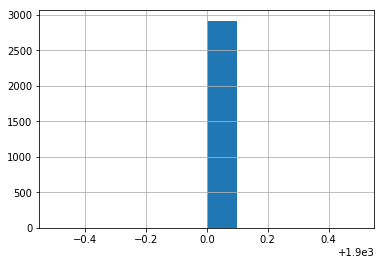

In [21]:
bad_start.INIZIO_PUBBLICITA.apply(get_year).sort_values().hist(bins=10)

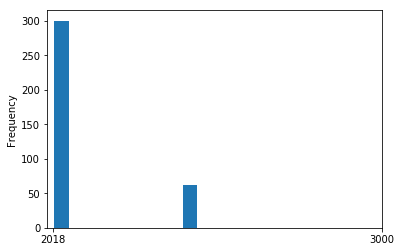

In [22]:
bad_date.DATA.apply(get_year).sort_values().plot('hist', xticks=[2018, 3000])

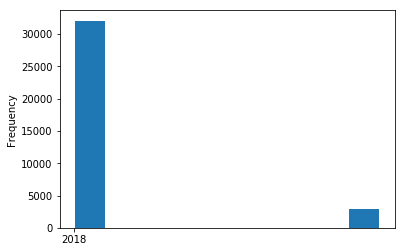

In [23]:
bad_end.FINE_PUBBLICITA.apply(get_year).sort_values().plot('hist', xticks=[2018])

## Solve irrealistic year:
- If start and end year are irrealistic then set to year data if consistent
- If data is inconsistent set data to the middle of start and end
- If only start is irrealistic set start to data
- If only end is irrealistic set end to data
- Otherwise delete the row

In [24]:
def solve_irrealistic_date(row):
    irrealistic_start = irrealistic_year(get_year(row['INIZIO_PUBBLICITA']))
    irrealistic_end = irrealistic_year(get_year(row['FINE_PUBBLICITA']))
    irrealistic_date = irrealistic_year(get_year(row['DATA']))
    if irrealistic_start and irrealistic_end and not irrealistic_date:
        row['INIZIO_PUBBLICITA'] =  row['DATA']
        row['FINE_PUBBLICITA'] = row['DATA']
    elif irrealistic_date and not irrealistic_start and not irrealistic_end:
        a, b = parse(row['INIZIO_PUBBLICTA']), parse(row['FINE_PUBBLICITA'])
        middle = middle_date(a,b)
        row['DATA'] =  format_date(middle)
    elif irrealistic_start and not irrealistic_end and not irrealistic_date:
        row['INIZIO_PUBBLICITA'] = row['DATA']
    elif irrealistic_end and not irrealistic_start and not irrealistic_date:
        row['FINE_PUBBLICITA'] = row['DATA']
    return row

In [25]:
dataset = dataset.apply(solve_irrealistic_date, axis=1)
dataset = dataset[~dataset.apply(irrealistic_year_row, axis=1)]

In [26]:
bad_start = dataset[dataset.INIZIO_PUBBLICITA.apply(get_year).apply(irrealistic_year)]
bad_end = dataset[dataset.FINE_PUBBLICITA.apply(get_year).apply(irrealistic_year)]
bad_date = dataset[dataset.DATA.apply(get_year).apply(irrealistic_year)]

In [27]:
len(bad_start) + len(bad_end) + len(bad_date)

0

## Invalid values on 'NUMERO_CLICK_SITO'
Simply remove the rows when the variable to predict is negative. In this case, because this is the variable to predict we can't replace the negative values with the mean of similar others

In [28]:
dataset = dataset[dataset.NUMERO_CLICK_SITO > 0]

In [29]:
dataset.to_csv('../data/interim/02-01-solved-irrealistic-year-negative-predvar.csv', index=False)